In [310]:
# General import statements
import numpy as np
import pandas as pd
import matplotlib as mpl
import gmaps
import math

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# Gmaps API
api = ""
gmaps.configure(api_key=api)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [311]:
# Load dataframe
df_original = pd.read_csv("reordered2016crashes.csv")

In [312]:
# Create related categories for indexing
category_time = ["CRASH_YEAR", "CRASH_MONTH", "TIME_OF_DAY", "HOUR_OF_DAY"]

category_conditions = ["ILLUMINATION", "WEATHER", "ROAD_CONDITION"]

category_type = ["COLLISION_TYPE", "URBAN_RURAL"]

category_people_count = ["PERSON_COUNT", "VEHICLE_COUNT"] 

category_injury = ["FATAL_COUNT", "INJURY_COUNT", "MAJ_INJ_COUNT", "MOD_INJ_COUNT", "MIN_INJ_COUNT", \
                   "UNK_INJ_DEG_COUNT", "MAX_SEVERITY_LEVEL"]

category_belt = ["UNBELTED", "UNBELTED_OCC_COUNT", "UNB_DEATH_COUNT", "UNB_MAJ_INJ_COUNT", "BELTED_DEATH_COUNT", \
                 "BELTED_MAJ_INJ_COUNT"]

category_age = ["DRIVER_COUNT_16YR", "DRIVER_COUNT_17YR", "DRIVER_COUNT_18YR", "DRIVER_COUNT_19YR", \
                "DRIVER_COUNT_20YR", "DRIVER_COUNT_50_64YR", "DRIVER_COUNT_65_74YR", "DRIVER_COUNT_75PLUS"]

category_location = ["LATITUDE", "LONGITUDE", "DEC_LAT", "DEC_LONG", "STREET_NAME"]

category_alcohol = ["ALCOHOL_RELATED", "DRINKING_DRIVER", "UNDERAGE_DRNK_DRV", "IMPAIRED_DRIVER"]

category_attention = ["CELL_PHONE", "DISTRACTED", "FATIGUE_ASLEEP"]

category_speed = ["LIMIT_65MPH", "SPEEDING", "SPEEDING_RELATED", "AGGRESSIVE_DRIVING"]

# Combine all categories
categories_all = category_time + category_conditions + category_type + category_people_count + \
                category_injury + category_belt + category_age + category_location + \
                category_alcohol + category_attention + category_speed

# Trim original dataframe into relevant data
df_trimmed = df_original[categories_all]

In [313]:
# Drop null values
df_trimmed.dropna()

# Reorder severity levels in ascending order
df_trimmed['MAX_SEVERITY_LEVEL'] = df_trimmed['MAX_SEVERITY_LEVEL'].replace(1, 5)
df_trimmed['MAX_SEVERITY_LEVEL'] = df_trimmed['MAX_SEVERITY_LEVEL'].replace(4, 1)
df_trimmed['MAX_SEVERITY_LEVEL'] = df_trimmed['MAX_SEVERITY_LEVEL'].replace(5, 4)
df_trimmed['MAX_SEVERITY_LEVEL'] = df_trimmed['MAX_SEVERITY_LEVEL'].replace(2, 5)
df_trimmed['MAX_SEVERITY_LEVEL'] = df_trimmed['MAX_SEVERITY_LEVEL'].replace(3, 2)
df_trimmed['MAX_SEVERITY_LEVEL'] = df_trimmed['MAX_SEVERITY_LEVEL'].replace(5, 3)

In [314]:
# Get latitudes and longitudes of accident locations
df_location = df_trimmed[category_location]
df_location_dec = df_location[['DEC_LAT','DEC_LONG']]
loc_series = df_location_dec.as_matrix(['DEC_LAT','DEC_LONG'])

# Do not plot NaN values on gmaps
loc_list = []
for i in loc_series:
    if( not math.isnan(i[0]) and not math.isnan(i[1])):
        loc_list.append((i[0],i[1]))

# Create gmaps figure and show
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(loc_list)
fig.add_layer(heatmap_layer)
fig

Widget Javascript not detected.  It may not be installed or enabled properly.


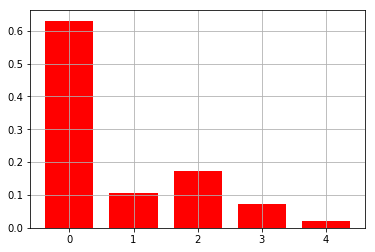

In [315]:
# Clear if graphDrunk exists, if so, clear (case for multiple runs)
try:
    graphDrunk
except NameError:
    pass
else: 
    graphDrunk.clear()

# Get drinking categories
df_isDrunk = df_trimmed[category_alcohol + category_injury]
df_isDrunk = df_isDrunk[["DRINKING_DRIVER","MAX_SEVERITY_LEVEL"]]

# Get if driver was drunk
df_Drunk = df_isDrunk[df_isDrunk['DRINKING_DRIVER'] == 1]
df_Drunk = df_Drunk[df_Drunk['MAX_SEVERITY_LEVEL'] <= 4]

# Plot
graphDrunk = df_Drunk["MAX_SEVERITY_LEVEL"].hist(bins=range(0,6), align='left', rwidth=0.75, color='red', normed=1)
graphDrunk.figure

In [316]:
# Clear graphDrunk after use
graphDrunk.clear()

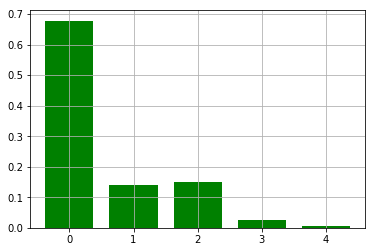

In [317]:
# Clear if graphDrunk exists, if so, clear (case for multiple runs)
try:
    graphNotDrunk
except NameError:
    pass
else: 
    graphNotDrunk.clear()

# Plots not drunk histogram
df_NotDrunk = df_isDrunk[df_isDrunk["DRINKING_DRIVER"] == 0]
graphNotDrunk = df_NotDrunk["MAX_SEVERITY_LEVEL"].hist(bins=range(0,6), align='left', rwidth=0.75, color='green', normed=1)
graphNotDrunk.figure

In [318]:
# Clear graphNotDrunk after use
graphNotDrunk.clear()

In [319]:
# Runs linear classifier / t-test on data

#outcome, predictors = patsy.dmatrices('MAX_SEVERITY_LEVEL ~ DRINKING_DRIVER', df_isDrunk)
# Use statsmodels to intialize the OLS model
#mod = sm.OLS(outcome, predictors)

# Fit the model
#res = mod.fit()

#print(res.summary())


In [320]:
df_weather = df_trimmed[category_conditions+category_injury]

df_weather = df_weather[['WEATHER','MAX_SEVERITY_LEVEL']]

df_weather = df_weather[df_weather['MAX_SEVERITY_LEVEL']<=4] # severity level 8-9 is unknown

df_weather_mean=[]

df_weather_1_mean =  df_weather[df_weather['WEATHER']==1]['MAX_SEVERITY_LEVEL'].mean() 

df_weather_2_mean =  df_weather[df_weather['WEATHER']==2]['MAX_SEVERITY_LEVEL'].mean() #rain

df_weather_3_mean =  df_weather[df_weather['WEATHER']==3]['MAX_SEVERITY_LEVEL'].mean() #hail

df_weather_4_mean =  df_weather[df_weather['WEATHER']==4]['MAX_SEVERITY_LEVEL'].mean() #snow

df_weather_5_mean =  df_weather[df_weather['WEATHER']==5]['MAX_SEVERITY_LEVEL'].mean() #fog

df_weather_6_mean =  df_weather[df_weather['WEATHER']==6]['MAX_SEVERITY_LEVEL'].mean() #rain and fog

df_weather_7_mean =  df_weather[df_weather['WEATHER']==7]['MAX_SEVERITY_LEVEL'].mean() #hail and fog

df_weather_mean.append(df_weather_1_mean)
df_weather_mean.append(df_weather_2_mean)
df_weather_mean.append(df_weather_3_mean)
df_weather_mean.append(df_weather_4_mean)
df_weather_mean.append(df_weather_5_mean)
df_weather_mean.append(df_weather_6_mean)
df_weather_mean.append(df_weather_7_mean)

df_weather_mean

[0.5828355479702548,
 0.5133333333333333,
 0.36666666666666664,
 0.33037300177619894,
 0.5882352941176471,
 0.25,
 0.0]